In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Implement a KNN model to classify the animals in to categorise

1.Read the data

In [2]:
data=pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


2.Perform EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [5]:
data[data.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [6]:
data.isnull()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


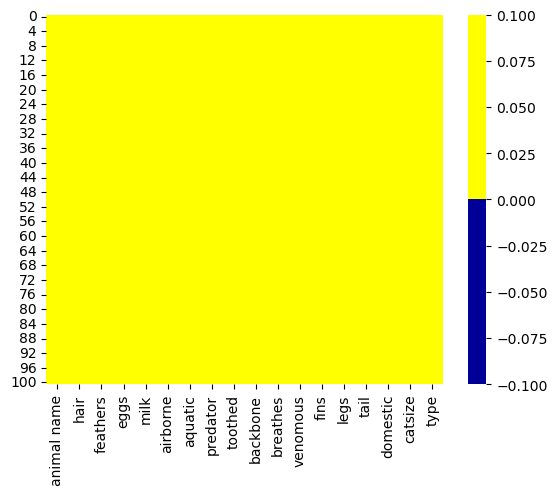

In [7]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(data.isnull(), cmap=pal)
plt.show()

3.Perform Corelation

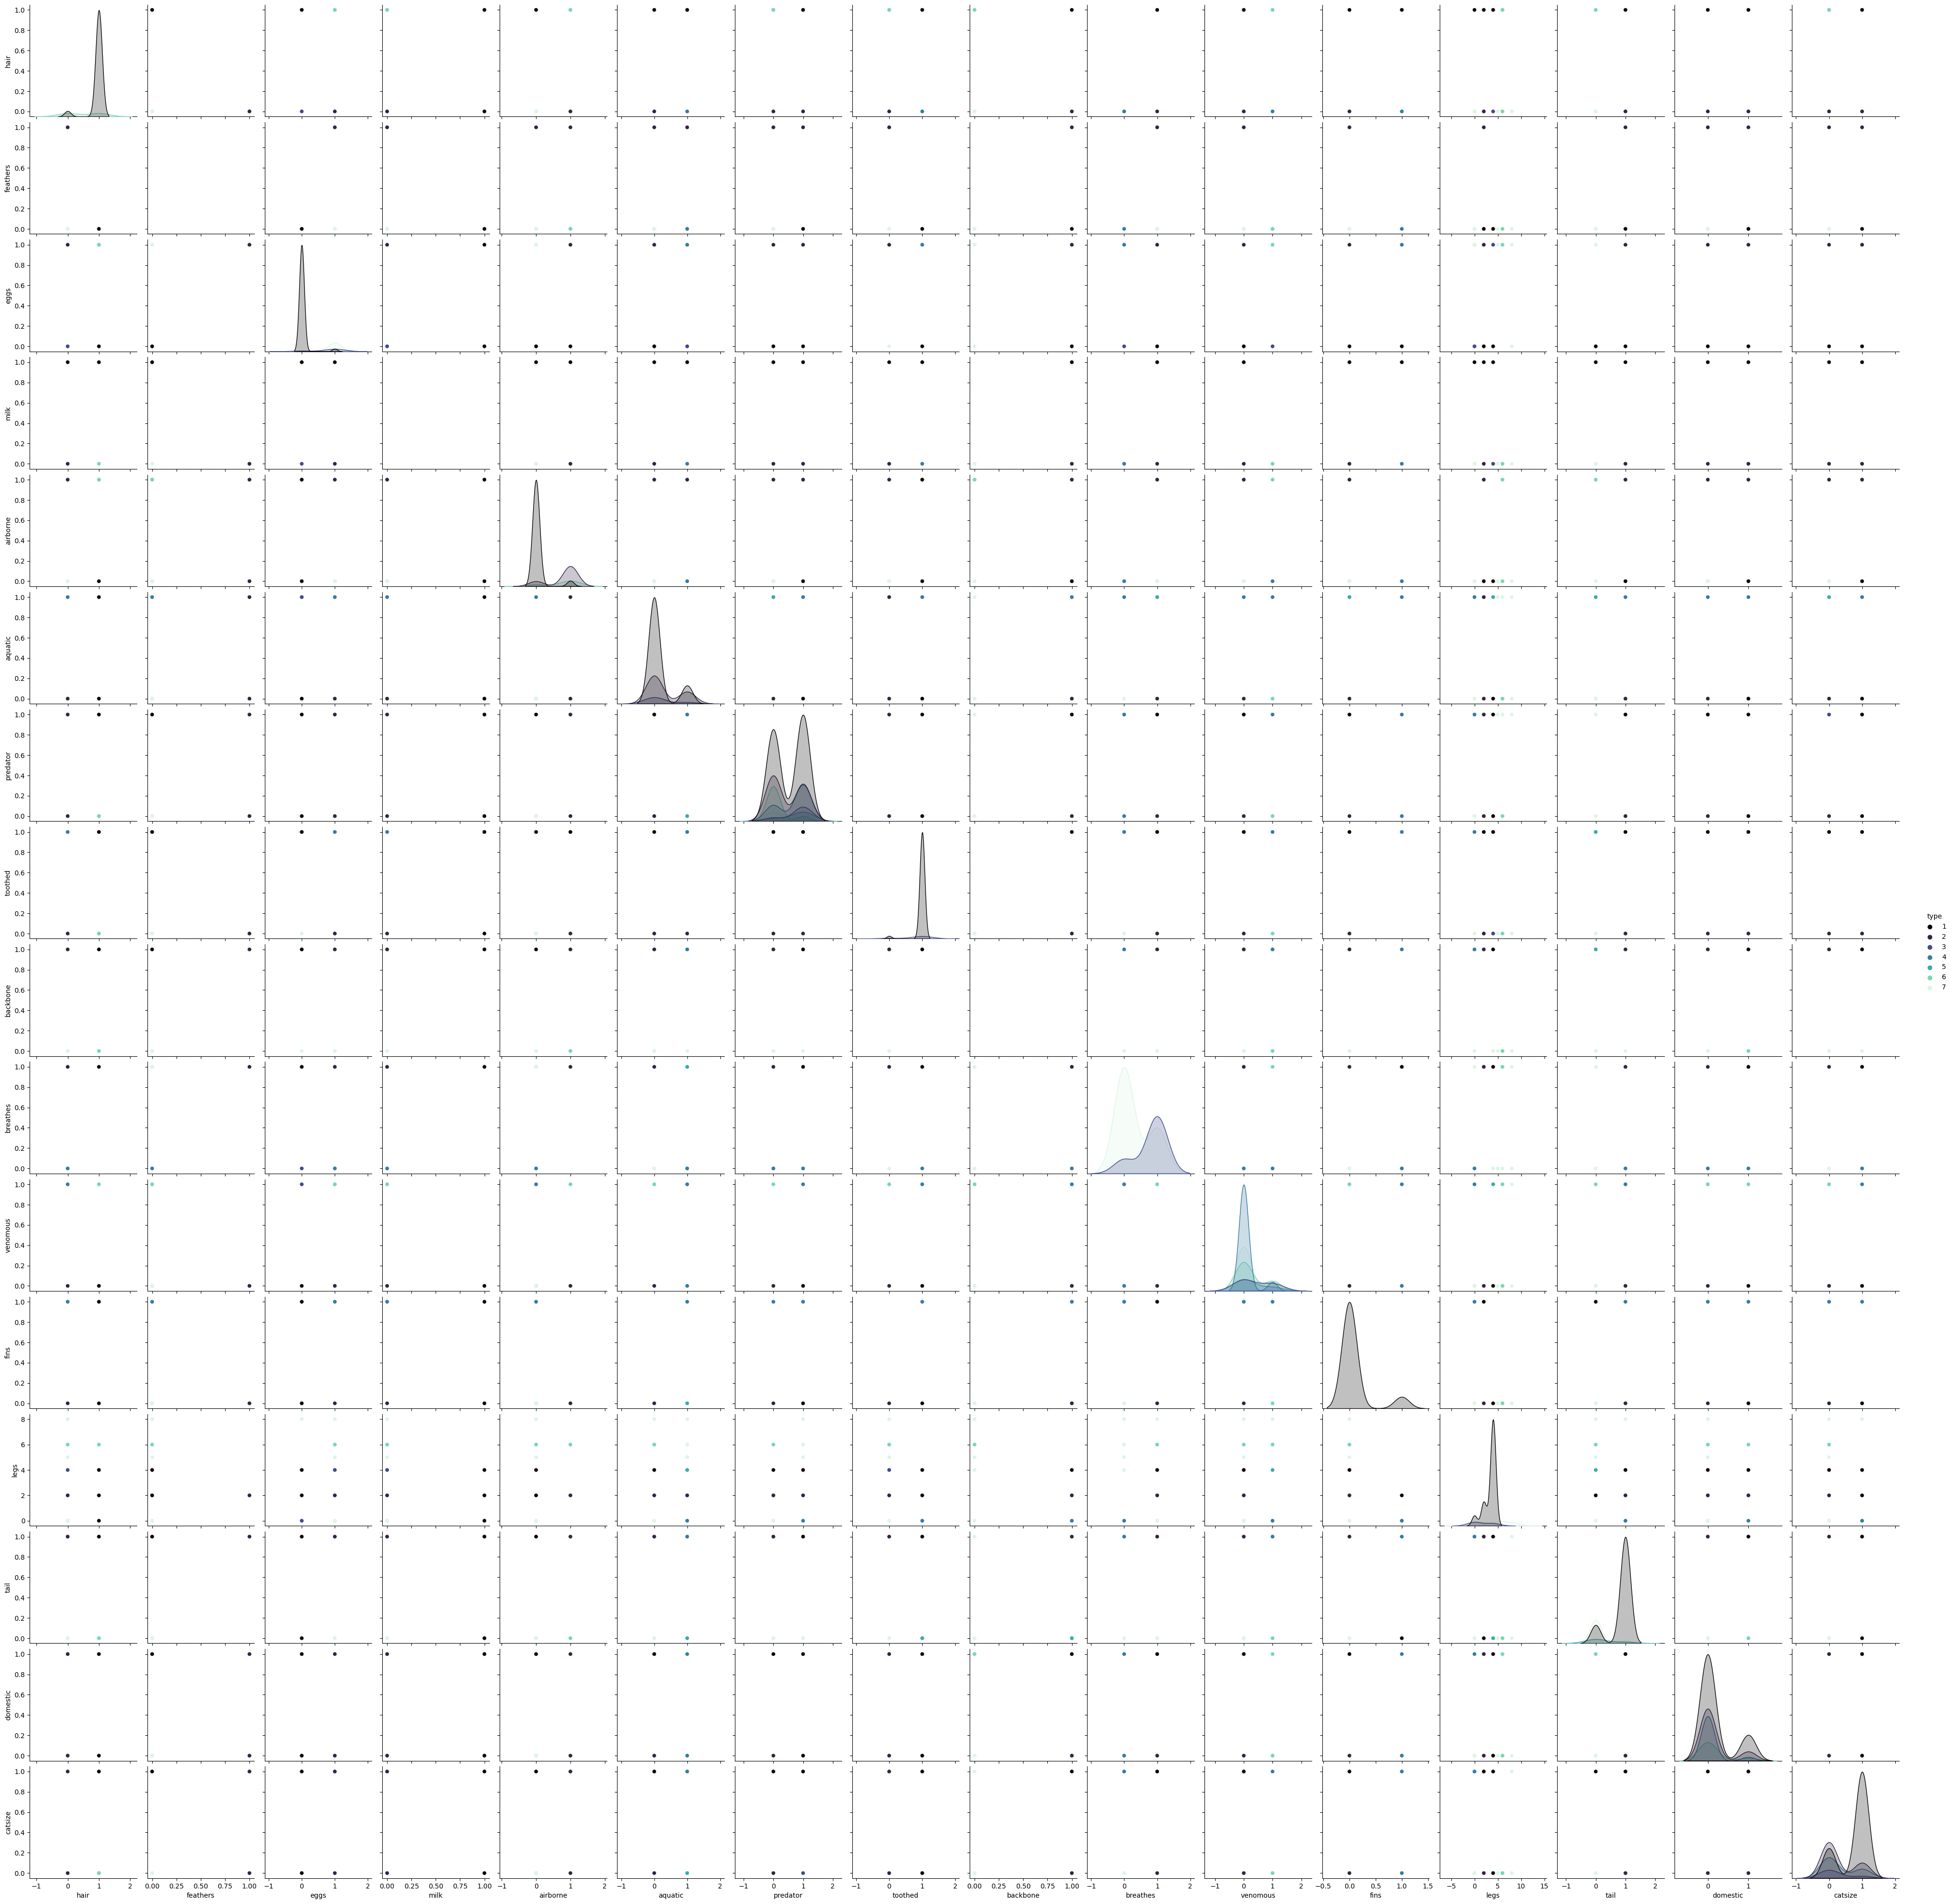

In [8]:
sns.pairplot(data,palette='mako',hue='type')
plt.show()

In [9]:
data.corr()

C:\Users\sreen\AppData\Local\Temp\ipykernel_14020\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


C:\Users\sreen\AppData\Local\Temp\ipykernel_14020\2920389395.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


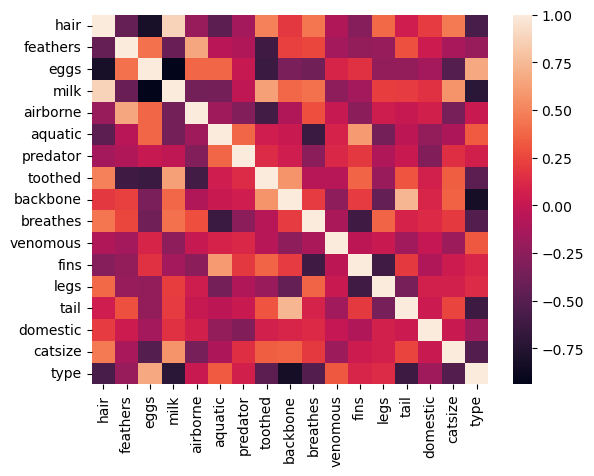

In [10]:
sns.heatmap(data.corr())
plt.show()

In [11]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


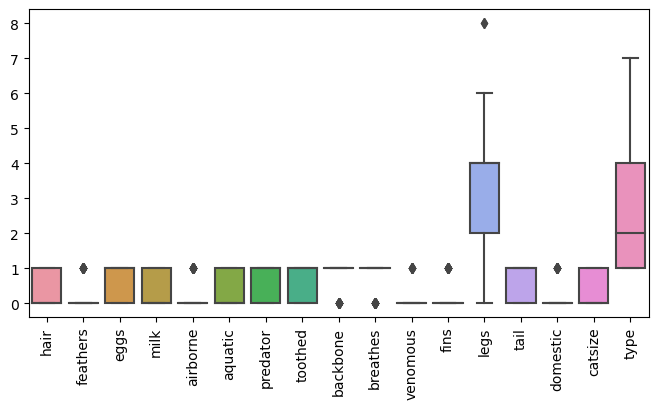

In [12]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = data)
plt.xticks(rotation=90)
plt.show()

In [13]:
X=data.iloc[:,1:17]   #Segregate the data
y=data.iloc[:,17]

5.Train Test and Split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 16), (21, 16), (80,), (21,))

In [16]:
type(X_train)

pandas.core.frame.DataFrame

In [17]:
X_train=X_train.values

In [18]:
X_test=X_test.values

#### Build the model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model=KNeighborsClassifier(n_neighbors=3)

In [21]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
train_pred=model.predict(X_train)
train_pred

array([5, 5, 6, 1, 7, 6, 7, 1, 1, 2, 5, 1, 1, 2, 1, 1, 7, 1, 2, 7, 4, 4,
       2, 4, 1, 1, 1, 5, 3, 1, 7, 6, 1, 1, 4, 4, 2, 1, 1, 1, 6, 2, 2, 1,
       1, 1, 7, 1, 4, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 2, 1, 7, 2, 1, 1, 5,
       2, 4, 2, 2, 7, 1, 4, 4, 2, 4, 2, 7, 4, 6], dtype=int64)

In [23]:
confusion_matrix(y_train,train_pred)

array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  1,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  9]], dtype=int64)

In [24]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        18
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00        11
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         9

    accuracy                           0.99        80
   macro avg       0.97      0.96      0.96        80
weighted avg       0.99      0.99      0.99        80



In [25]:
test_pred=model.predict(X_test)

In [26]:
confusion_matrix(y_test,test_pred)

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [27]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For K=3 neighbors , training accuracy is 99% and testing accuracy is 95%

#### Elbow plot

In [28]:
tr_acc=[]
ts_acc=[]
for k in range (1,15):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    train_accuracy=model.score(X_train,y_train)
    test_accuracy=model.score(X_test,y_test)
    tr_acc.append(train_accuracy)
    ts_acc.append(test_accuracy)


Perform the Elbow curve

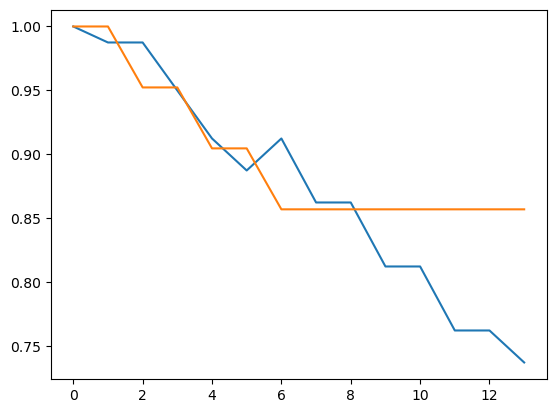

In [29]:
plt.plot(tr_acc)
plt.plot(ts_acc)
plt.show()

In [30]:
model=KNeighborsClassifier(n_neighbors=1)

In [31]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
train_pred=model.predict(X_train)
train_pred

array([5, 5, 6, 1, 7, 6, 7, 1, 1, 2, 3, 1, 1, 2, 1, 1, 7, 1, 2, 7, 4, 4,
       2, 4, 1, 1, 1, 5, 3, 1, 7, 6, 1, 1, 4, 4, 2, 1, 1, 1, 6, 2, 2, 1,
       1, 1, 7, 1, 4, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 2, 1, 7, 2, 1, 1, 5,
       2, 4, 2, 2, 7, 1, 4, 4, 2, 4, 2, 7, 4, 6], dtype=int64)

In [33]:
confusion_matrix(y_train,train_pred)

array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  9]], dtype=int64)

In [34]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         9

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [35]:
test_pred=model.predict(X_test)

In [36]:
confusion_matrix(y_test,test_pred)

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [37]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



For K=1 accuracy is 100% for both training and testing data

In [38]:
from sklearn.manifold import TSNE

In [39]:
model1=TSNE(n_components=2)

In [40]:
tsne_comps=model1.fit_transform(X)

Perform the scatter plot

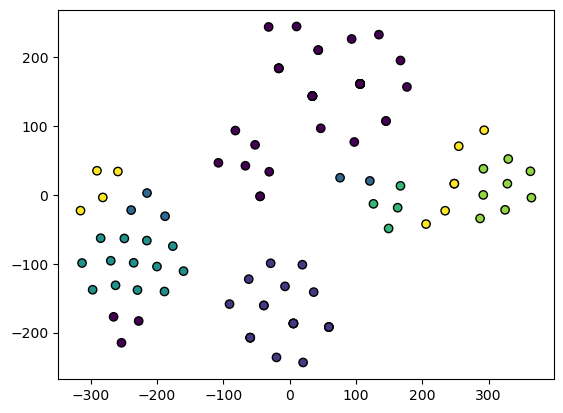

In [41]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis',edgecolors='k')
plt.show()

# ********************************************************************************************************************************

# Prepare a model for glass classification using KNN

Data Description:

RI : refractive index;Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10);
Mg: Magnesium;AI: Aluminum;Si: Silicon;K:Potassium;Ca: Calcium;Ba: Barium and Fe: Iron

                            Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

1.Read the data

In [42]:
datag=pd.read_csv('glass.csv')
datag.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


2.Perform EDA

In [43]:
datag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [44]:
datag.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [45]:
datag[datag.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [46]:
datag.drop_duplicates(inplace=True)
datag.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [47]:
datag.reset_index(drop=True,inplace=True)

In [48]:
datag.isnull()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
208,False,False,False,False,False,False,False,False,False,False
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False


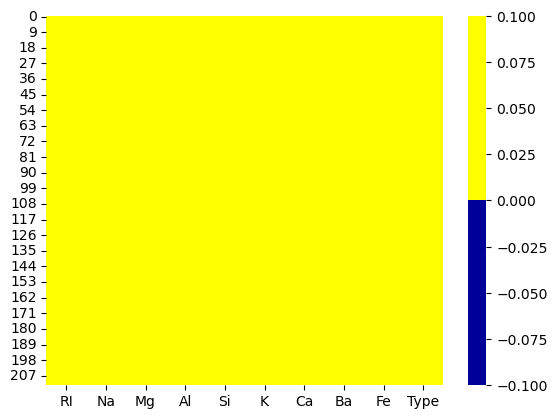

In [49]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(datag.isnull(), cmap=pal)
plt.show()

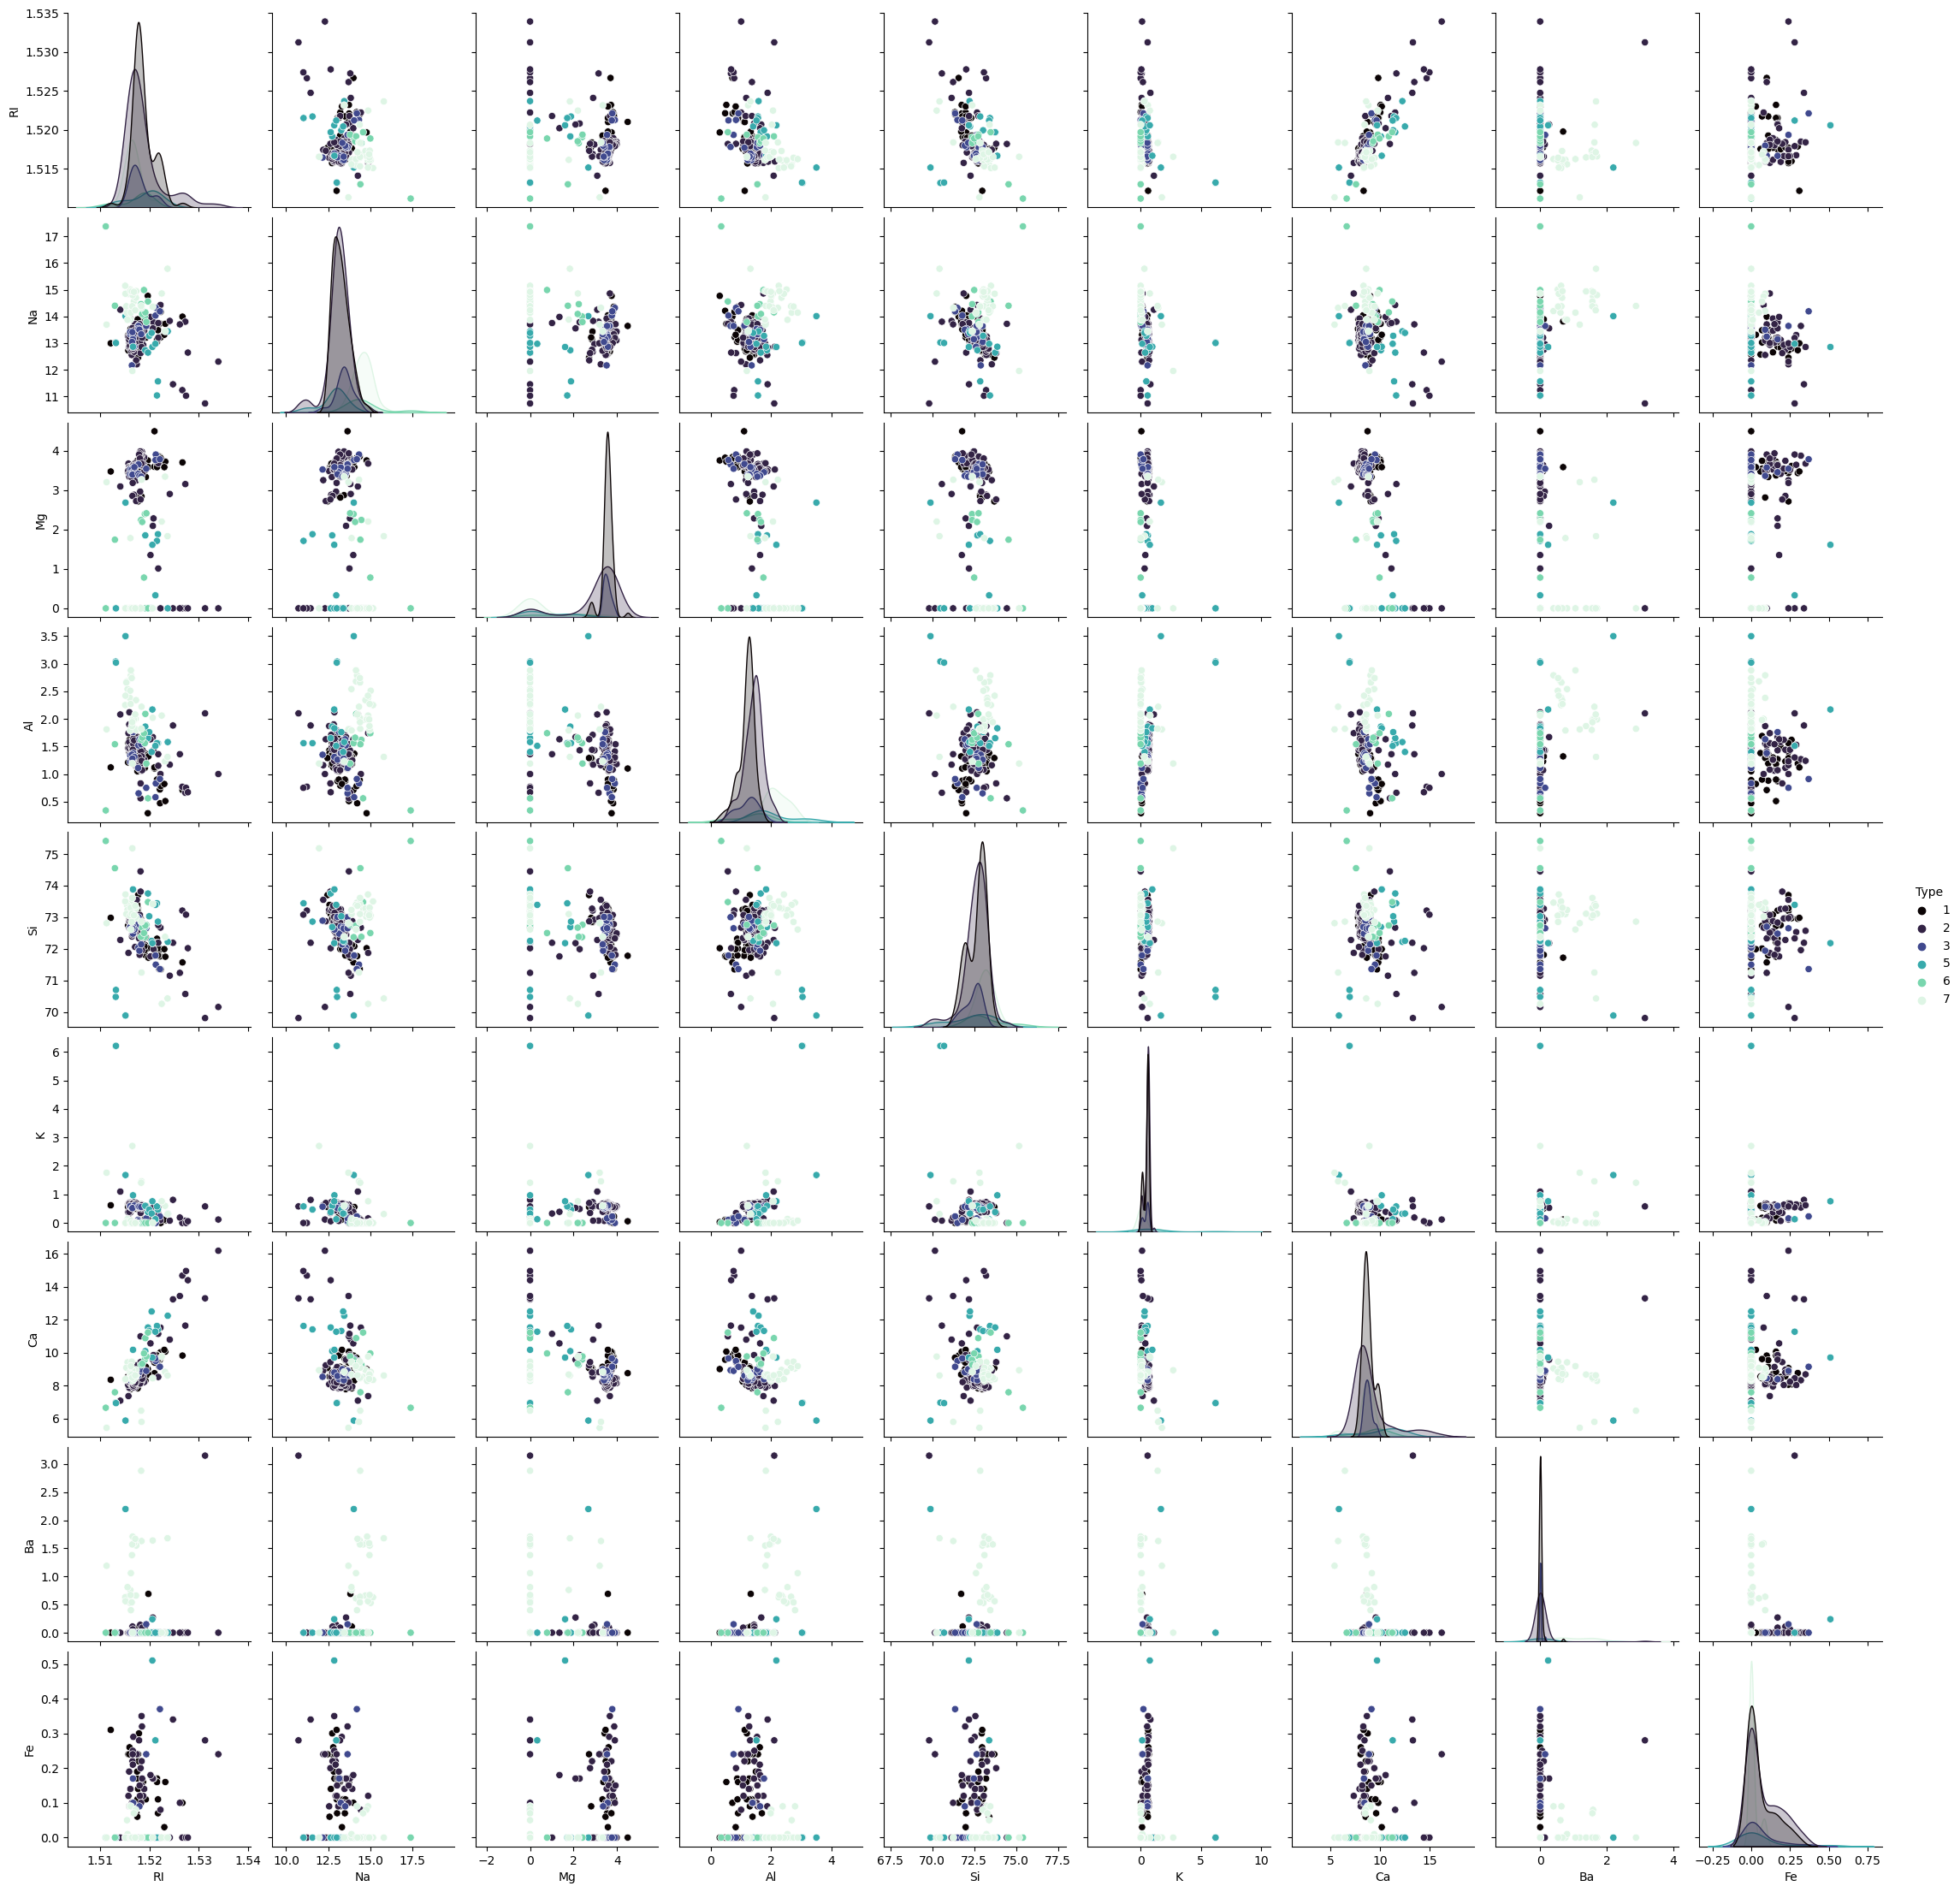

In [50]:
sns.pairplot(datag,palette='mako',hue='Type')
plt.show()

In [51]:
datag.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


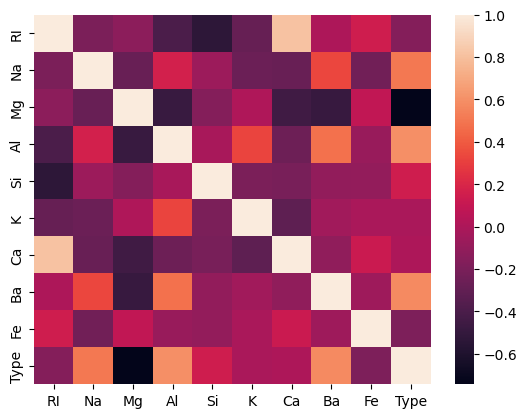

In [52]:
sns.heatmap(datag.corr())
plt.show()

In [53]:
datag.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


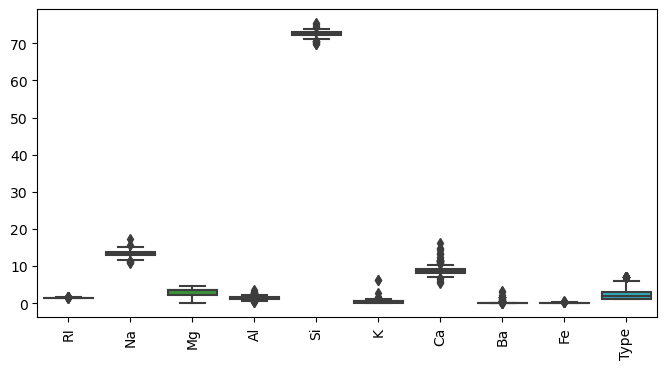

In [54]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = datag)
plt.xticks(rotation=90)
plt.show()

In [55]:
X=datag.iloc[:,0:9]
y=datag.iloc[:,9]

Train ,Test and split

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170, 9), (43, 9), (170,), (43,))

#### Build the model

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
model2=KNeighborsClassifier(n_neighbors=3)

In [60]:
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
train_pred=model2.predict(X_train)
train_pred

array([2, 3, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 1, 5, 1, 2, 1, 1, 7, 5,
       2, 1, 5, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 5, 2, 1, 1, 2, 2, 3, 2,
       2, 1, 2, 1, 1, 3, 2, 1, 2, 1, 1, 7, 1, 1, 2, 2, 1, 1, 7, 6, 1, 1,
       2, 7, 3, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 6, 2, 7, 2, 2, 5, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 7, 1, 2, 5, 1, 3, 1, 2, 1, 1, 7, 5, 7, 1,
       2, 1, 1, 2, 2, 2, 2, 7, 2, 1, 1, 3, 6, 2, 3, 5, 2, 7, 2, 6, 7, 1,
       2, 2, 1, 5, 7, 5, 1, 1, 2, 1, 1, 3, 7, 2, 2, 1, 3, 7, 1, 1, 1, 5,
       3, 2, 2, 2, 2, 2, 2, 7, 1, 7, 2, 2, 1, 2, 7, 2], dtype=int64)

In [62]:
confusion_matrix(y_train,train_pred)

array([[51,  4,  4,  0,  0,  0],
       [ 9, 50,  0,  2,  0,  0],
       [ 7,  0,  7,  0,  0,  0],
       [ 0,  1,  0,  9,  0,  0],
       [ 0,  1,  0,  0,  4,  1],
       [ 1,  3,  0,  0,  0, 16]], dtype=int64)

In [63]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           1       0.75      0.86      0.80        59
           2       0.85      0.82      0.83        61
           3       0.64      0.50      0.56        14
           5       0.82      0.90      0.86        10
           6       1.00      0.67      0.80         6
           7       0.94      0.80      0.86        20

    accuracy                           0.81       170
   macro avg       0.83      0.76      0.79       170
weighted avg       0.81      0.81      0.80       170



In [64]:
test_pred=model2.predict(X_test)
test_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 7, 1, 2, 6, 5, 7, 1, 1, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 6, 1, 1, 2, 3, 1, 2, 7, 7, 1, 1, 1, 2, 1, 1],
      dtype=int64)

In [65]:
confusion_matrix(y_test,test_pred)

array([[10,  0,  0,  0,  0,  0],
       [ 6,  8,  0,  1,  0,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  2],
       [ 0,  1,  0,  0,  2,  0],
       [ 1,  1,  0,  0,  0,  7]], dtype=int64)

In [66]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       0.53      1.00      0.69        10
           2       0.80      0.53      0.64        15
           3       1.00      0.33      0.50         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       0.78      0.78      0.78         9

    accuracy                           0.67        43
   macro avg       0.77      0.61      0.63        43
weighted avg       0.74      0.67      0.67        43



In [67]:
tr_acc=[]
ts_acc=[]
for k in range (1,15):
    model1=KNeighborsClassifier(n_neighbors=k)
    model1.fit(X_train,y_train)
    train_accuracy=model1.score(X_train,y_train)
    test_accuracy=model1.score(X_test,y_test)
    tr_acc.append(train_accuracy)
    ts_acc.append(test_accuracy)

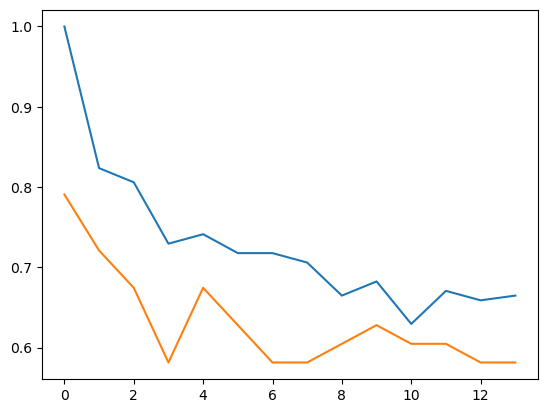

In [68]:
plt.plot(tr_acc)
plt.plot(ts_acc)
plt.show()

Here k=10 is near for both Training and Testing data

In [69]:
model4=TSNE(n_components=2)

In [70]:
tsne_comps=model4.fit_transform(X)

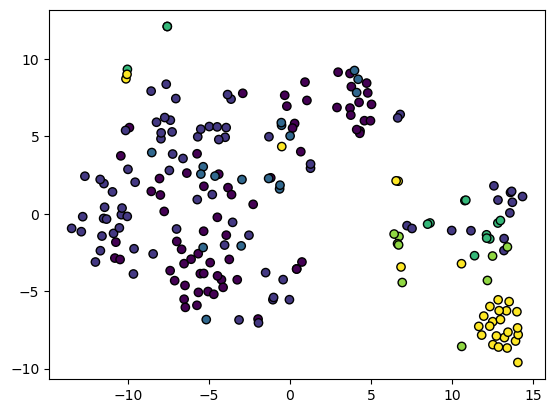

In [71]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1],c=y,cmap='viridis',edgecolors='k')
plt.show()

# **************************************************************************************************************************************